#**The rbpTransformer Test Results**
The full code will be shared after the paper titled "rbpTransformer: A novel deep learning model for prediction of RNA and protein bindings" becomes published. An example trining and test results can be seen in this file.

In [ ]:
history = transformer.fit([piRNA_train, mRNA_train],
          y_train,
          batch_size=32,
          epochs=100,
          validation_data=([piRNA_val, mRNA_val], y_val))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


2267/2267 ━━━━━━━━━━━━━━━━━━━━ 94s 24ms/step - accuracy: 0.5656 - loss: 0.6690 - val_accuracy: 0.6708 - val_loss: 0.5965
Epoch 2/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.6968 - loss: 0.5739 - val_accuracy: 0.7171 - val_loss: 0.5495
Epoch 3/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7312 - loss: 0.5365 - val_accuracy: 0.7514 - val_loss: 0.5107
Epoch 4/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7657 - loss: 0.4887 - val_accuracy: 0.7992 - val_loss: 0.4307
Epoch 5/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8087 - loss: 0.4239 - val_accuracy: 0.8069 - val_loss: 0.4271
Epoch 6/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8136 - loss: 0.4112 - val_accuracy: 0.8188 - val_loss: 0.4065
Epoch 7/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8233 - loss: 0.3958 - val_accuracy: 0.8249 - val_loss: 0.3872
Epoch 8/100
2267/2267 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8275 - loss: 0.38

#Evaluate the model on test dataset and build the confusion matrix

756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8694 - loss: 0.3164
756/756 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step
Precision: 0.892
Recall: 0.838
F1 Score: 0.864
Accuracy: 0.868


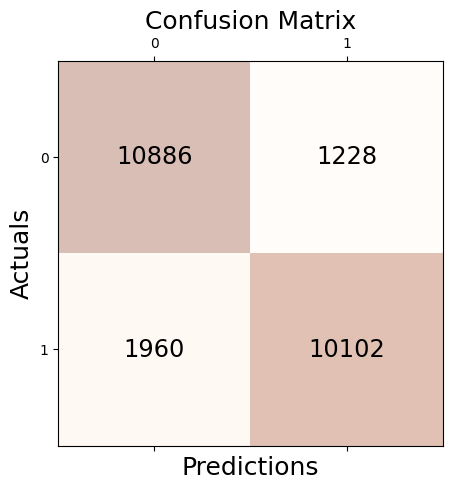

In [ ]:
loss, accuracy = transformer.evaluate([piRNA_test,mRNA_test], y_test)
y_pred = transformer.predict([piRNA_test,mRNA_test])

for i, item in enumerate(y_pred):
  if item >= 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
